In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import SimpleITK as sitk
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## 1. N4 Bias Correction

In [3]:
from helpers.bias_correction import bias_field_correction

In [4]:
img = sitk.ReadImage("imgs/bias.jpg")
img_viewer = sitk.ImageViewer()  # needs to install Fiji: https://simpleitk.org/TUTORIAL/
img_viewer.Execute(img)
img_array = sitk.GetArrayFromImage(img)

In [5]:
img_nii_path = "../image_denoising/data/MPR_500um_32_avg.norm.norm.nii"
img_nii = sitk.ReadImage(img_nii_path, imageIO="NiftiImageIO")
img_nii_array = sitk.GetArrayViewFromImage(img_nii)
img_nii_nib = nib.load(img_nii_path)
img_nii_nib_array = img_nii_nib.get_fdata()
img_nii.GetSize(), img_nii_array.shape, img_nii_nib_array.shape

((378, 448, 192), (192, 448, 378), (378, 448, 192))

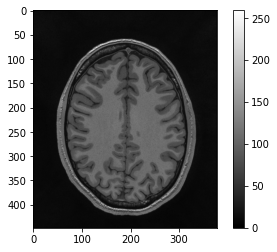

In [6]:
slice_num = 100
plt.imshow(img_nii_array[slice_num, :, :], cmap="gray")
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


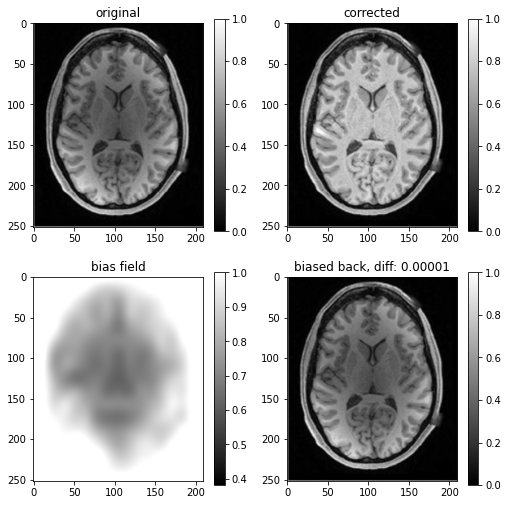

In [7]:
img_corrected_array, log_bias_field = bias_field_correction(img_array / 255., if_plot=True)

## 2. GMM

In [8]:
from sklearn.mixture import GaussianMixture
from helpers.gmm_segmentation import segmentation

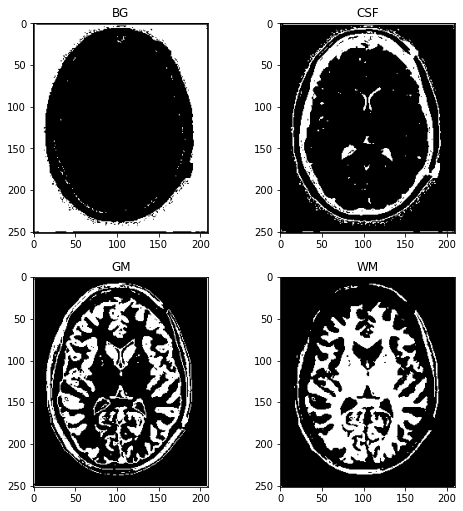

In [9]:
img_seg, gmm = segmentation(img_corrected_array, if_plot=True)

In [10]:
gmm.weights_, gmm.means_, gmm.covariances_

(array([0.24437702, 0.33192821, 0.14780158, 0.27589319]),
 array([[0.54741391],
        [0.01008734],
        [0.1557188 ],
        [0.7446488 ]]),
 array([[[7.94348760e-03]],
 
        [[5.01325443e-05]],
 
        [[1.23665298e-02]],
 
        [[3.56738868e-03]]]))